In [38]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)

%matplotlib inline

### 2.0 Data Overview:

In [5]:
df = pd.read_csv('data/cj_single_view.csv', index_col=0)
df.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,affinity_raw,affinity_rank_pct,affinity_rank_centered,affinity_log,affinity_log_scaled,affinity_rank_buckets,affinity_score
0,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,26,224,264,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.4,0.31,1,1
1,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,30,323,369,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.4,0.31,1,1
2,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,8,412,460,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.4,0.31,1,1
3,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,13,504,551,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.4,0.31,1,1
4,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,18,587,642,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.4,0.31,1,1


### 3.0 Data Pre-Processing:

In [15]:
print('Dataset headers:', df.columns)

# Changing columns names to lower case for uniformity:
df.columns = map(str.lower, df.columns)
print('Lowercase headers:', df.columns)

Dataset headers: Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer',
       'household_key', 'BASKET_ID', 'DAY', 'QUANTITY', 'SALES_VALUE',
       'RETAIL_DISC', 'TRANS_TIME', 'COUPON_DISC', 'COUPON_MATCH_DISC',
       'DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'MANUFACTURER',
       'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'COUPON_UPC', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'affinity_raw', 'affinity_rank_pct',
       'affinity_rank_centered', 'affinity_log', 'affinity_log_scaled',
       'affinity_rank_buckets', 'affinity_score'],
      dtype='object')
Lowercase headers: Index(['product_id', 'store_id', 'week_no', 'display', 'mailer',
       'household_key', 'basket_id', 'day', 'quantity', 'sales_value',
       'retail_disc', 'trans_time', 'coupon_disc', 'coupon_match_disc',
       'description', 'campaign', '

In [16]:
df.info()

# Changing classification of object types to lower memory usage:
df[['display', 'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']] = df[['display', 
    'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']].astype('category')
df[['commodity_desc', 'sub_commodity_desc', 'curr_size_of_product']] = df[['commodity_desc', 
    'sub_commodity_desc', 'curr_size_of_product']].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   object
mailer                    object
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               object
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                object
brand                     object
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  object
marital_status_code       object
incom

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   category
mailer                    category
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               category
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                category
brand                     category
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  category
marital_status_code       

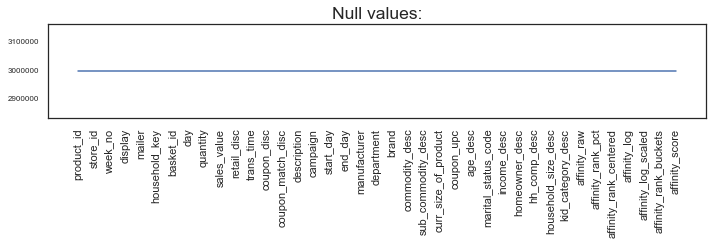

In [39]:
plt.figure(figsize=(10, 3.5))

_ = plt.plot(df.isnull().count())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(rotation=90)
_ = plt.yticks(size=8)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

In [49]:
households = len(df['household_key'].unique())
purchase_info = df[['product_id', 'store_id', 'household_key', 'basket_id', 'sales_value', 'start_day']]
purchase_summary = purchase_info.groupby(['start_day', 'household_key', 'store_id', 'basket_id', 'store_id', 'product_id']).sum().sort_values(by=['start_day'])
purchase_summary
# household_17 = purchase_summary.xs((224, 17), level = ('start_day', 'household_key'), drop_level = False)
# print(household_17)

sales_value
start_day household_key store_id basket_id   store_id product_id             
224       17            320      31085500390 320      823704             5.00
          1784          370      42090718060 370      1082185            0.62
                                                      998119             6.98
                                                      915493             2.00
                                                      849505             3.99
...                                                                       ...
659       845           343      31541319133 343      907418             1.00
                                                      910151             1.00
                                                      1058997            1.00
                                 31623992433 343      824931             3.99
          2489          34037    42076505211 34037    15716977           5.76

[2970118 rows x 1 columns]

In [52]:
purchase_summary.xs((224), level = ('start_day'), drop_level = False)

sales_value
start_day household_key store_id basket_id   store_id product_id             
224       17            320      31085500390 320      823704             5.00
          1784          370      42090718060 370      1082185            0.62
                                                      998119             6.98
                                                      915493             2.00
                                                      849505             3.99
...                                                                       ...
          864           410      31833660573 410      936846             2.99
                                                      1044078            5.05
                                                      937292             5.00
                                 31956431208 410      854405             5.99
                                 31833660573 410      1029743            1.77

[113058 rows x 1 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   category
mailer                    category
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               category
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                category
brand                     category
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  category
marital_status_code       

### 4.0 Data Analysis:

In [62]:
df[df['start_day'] == 224].head()

,product_id,store_id,week_no,display,mailer,household_key,basket_id,day,quantity,sales_value,retail_disc,trans_time,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,coupon_upc,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,affinity_raw,affinity_rank_pct,affinity_rank_centered,affinity_log,affinity_log_scaled,affinity_rank_buckets,affinity_score
0,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,26,224,264,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.05,-0.91,-0.40,0.31,1,1
8,818980,367,67,9,0,883,33944581838,467,1.0,0.89,0.00,1204,0,0,TypeA,26,224,264,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.89,0.09,-0.82,-0.12,0.33,1,1
36,818981,315,43,0,D,2224,31355476901,294,1.0,2.00,-1.79,2015,0,0,TypeA,26,224,264,194,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,10.4 OZ,NaN,19-24,B,250K+,Homeowner,Single Male,1,None/Unknown,2.00,0.45,-0.10,0.69,0.39,3,3
69,818981,333,30,5,A,258,30035554716,207,1.0,2.00,-1.59,2015,0,0,TypeA,26,224,264,194,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,10.4 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.45,-0.10,0.69,0.39,3,3
101,818981,367,25,5,D,1710,29276491861,172,1.0,2.50,-1.09,1836,0,0,TypeA,26,224,264,194,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,10.4 OZ,NaN,35-44,A,150-174K,Homeowner,Single Male,2,None/Unknown,2.50,0.55,0.10,0.92,0.41,3,3


In [68]:
sorted_dates = df['start_day'].sort_values()

In [70]:
sorted_dates.count()

2993709

In [71]:
sorted_dates

0          224
1668404    224
1668384    224
1668356    224
1668351    224
          ... 
1314635    659
1314645    659
1314646    659
1314576    659
2424433    659
Name: start_day, Length: 2993709, dtype: int64